The dataset was downloaded from Kaggle 'https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification/data'

In [ ]:
!unzip /content/drive/MyDrive/test.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/traffic_Data/DATA/26/026_0028.png  
  inflating: test/traffic_Data/DATA/26/026_0029.png  
  inflating: test/traffic_Data/DATA/26/026_0030.png  
  inflating: test/traffic_Data/DATA/26/026_0031.png  
  inflating: test/traffic_Data/DATA/26/026_0032.png  
  inflating: test/traffic_Data/DATA/26/026_0033.png  
  inflating: test/traffic_Data/DATA/26/026_0034.png  
  inflating: test/traffic_Data/DATA/26/026_0035.png  
  inflating: test/traffic_Data/DATA/26/026_0036.png  
  inflating: test/traffic_Data/DATA/26/026_0037.png  
  inflating: test/traffic_Data/DATA/26/026_0038.png  
  inflating: test/traffic_Data/DATA/26/026_0039.png  
  inflating: test/traffic_Data/DATA/26/026_0040.png  
  inflating: test/traffic_Data/DATA/26/026_0041.png  
  inflating: test/traffic_Data/DATA/26/026_0042.png  
  inflating: test/traffic_Data/DATA/26/026_0043.png  
  inflating: test/traffic_Data/DATA/26/026_0044.png  
  inflating: test/traffic_Data/

In [ ]:
import cv2
import numpy as np
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D



%matplotlib inline

In [ ]:
#read all image files

file_path=(r'/content/test/traffic_Data/DATA')

each_file_path=[]
labels=[]

df=pd.read_csv('/content/test/labels.csv')
col_name=df['ClassId']
num_of_classes= len(col_name)


image_size = (72, 72)
for folder in range(0, num_of_classes):
    path=os.path.join(file_path,str(folder))
    file_names=os.listdir(path)

    for file_name in file_names:
        full_path= os.path.join(path,file_name)
        each_file_path.append(full_path)
        labels.append(folder)

image_data=[]

for image in each_file_path:
    img=Image.open(image)
    img = img.resize((72, 72))
    img= img.convert('L')
    img= np.array(img)
    img= cv2.equalizeHist(img)
    img=img/255
    image_data.append(img)

In [ ]:
#split the dataset into train dataset and validation dataset.

X_train, X_val, y_train, y_val = train_test_split(image_data, labels, test_size=0.2, random_state=42)

X_train=np.array(X_train)
y_train=np.array(y_train)
X_val=np.array(X_val)
y_val=np.array(y_val)

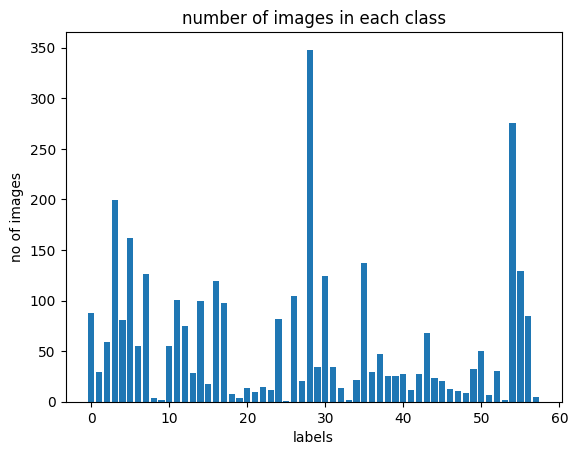

In [ ]:
#Display the number images in each class

num_of_elements_in_each_class=[]
for i in range(num_of_classes):
    b=[]
    for j in y_train:
        if i==j:
            b.append(i)
    num_of_elements_in_each_class.append(len(b))
num_of_elements_in_each_class=np.array(num_of_elements_in_each_class)

#create a bar chart representing number of images in each class
plt.bar(range(num_of_classes),num_of_elements_in_each_class)
plt.title('number of images in each class')
plt.xlabel('labels')
plt.ylabel('no of images')
plt.show()

In [ ]:
#reshaping train and validation data into desired shape for training
# converting label data into desired shape for training
elements_in_X_train=X_train.shape[0]
elements_in_X_val=X_val.shape[0]
X_train=X_train.reshape(elements_in_X_train,72,72,1)
X_val=X_val.reshape(elements_in_X_val,72,72,1)

y_val=to_categorical(y_val)
y_train = to_categorical(y_train)

In [ ]:
#define parameters for data augmentation

datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
datagen.fit(X_train)


In [ ]:
#define parameters for CNN model

def Conv_model():
    model= Sequential()
    model.add(Conv2D(60,(5,5),input_shape=(72,72,1),activation='relu'))
    model.add(Conv2D(60,(5,5),activation='relu'))
    model.add(Conv2D(60,(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(58, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001 ), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model= Conv_model()
print(model.summary())

history=model.fit(datagen.flow(X_train,y_train,batch_size=24), validation_data=(X_val,y_val),epochs=18, steps_per_epoch=139, shuffle=1)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 68, 68, 60)        1560      
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 60)        90060     
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 60)        90060     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 60)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 30)        16230     
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 30)        8130      
                                                      

Text(0.5, 0, 'epoch')

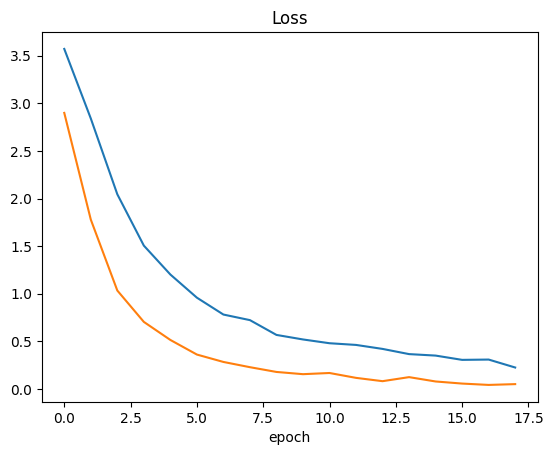

In [ ]:
#Plot performance(loss) per epoch

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

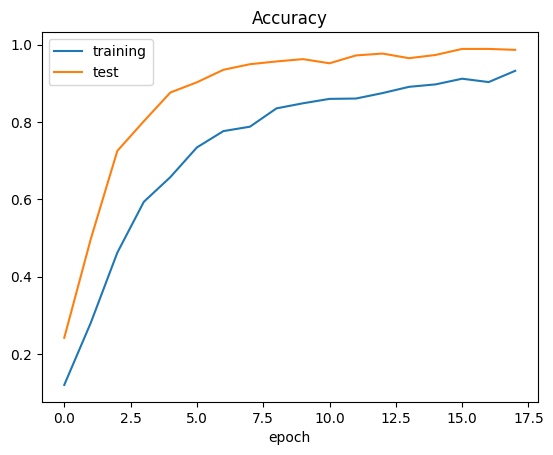

In [ ]:
#Plot performance(accuracy) per epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')



In [ ]:
#save the model
model.save('my_model.h10')


In [ ]:
#Prepare data from test folder for testing the trained model
test_folder = '/content/test/traffic_Data/TEST'
test_files_list = os.listdir(test_folder)
test_images = []
test_labels = []

for each_file in test_files_list:
    x = each_file.split('_')
    label = int(x[0])
    full_path = os.path.join(test_folder, each_file)
    img = Image.open(full_path)
    img = img.resize((72, 72))
    img = img.convert('L')
    img = np.array(img)
    img = cv2.equalizeHist(img)
    img = img / 255.0
    test_images.append(img)
    test_labels.append(label)

X_test = np.array(test_images)
y_test = np.array(test_labels)
y_test = to_categorical(y_test, num_classes=58)
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)




In [ ]:
# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, verbose=2)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])# score = model.evaluate(test_images, test_labels,verbose=1)
# print(score)

63/63 - 1s - loss: 0.7953 - accuracy: 0.8255 - 818ms/epoch - 13ms/step
Test Loss: 0.7952625155448914
Test Accuracy: 0.8254764080047607


In [ ]:
'''import urllib.request
from PIL import Image
urllib.request.urlretrieve('https://media.istockphoto.com/photos/traffic-sign-show-the-turn-right-picture-id186977779?k=6&m=186977779&s=612x612&w=0&h=6PcPiau5mUT6XnQkgiq0ytj_sO0WU2S9EnqKh2GaMGA=','test.png')
img=Image.open('test.png')
# img = img.convert('L')
# new_size = (72, 72)  # Specify the new size in pixels
# resized_img =img.resize(new_size)
# img=np.array(resized_img)

img = np.array(img)
img = cv2.resize(img, image_size)
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img= cv2.equalizeHist(img)
img=img/255
img.shape

img = img.reshape(1, 72, 72, 1)

plt.imshow(img[0])
np.argmax(model.predict(img), axis=-1)

'''

In [ ]:
'''import urllib.request
from PIL import Image
urllib.request.urlretrieve('https://media.istockphoto.com/photos/traffic-sign-show-the-turn-right-picture-id186977779?k=6&m=186977779&s=612x612&w=0&h=6PcPiau5mUT6XnQkgiq0ytj_sO0WU2S9EnqKh2GaMGA=','tst.png')
img=Image.open('tst.png')
#img.show()
#url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
# r = requests.get(url, stream=True)
# img = Image.open(r.raw)
#plt.imshow(img, cmap=plt.get_cmap('gray'))

img = np.array(img)
img = cv2.resize(img, image_size)
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img= cv2.equalizeHist(img)
img=img/255
plt.imshow(img)

img = img.reshape(1, 72, 72, 1)
np.argmax(model.predict(img), axis=-1)'''